# Seaborn

* Seaborn yra duomenų vizualizacijos biblioteka. 
* Ji sukurta Matplotlib pagrindu.
* Stilistiškai kiek išbaigtesnė už Matplotlib.
* Labai gerai veikia su pandas DataFrame'ais.
* Labai plačiai naudojama duomenų analizėje.
* Dokumentaciją rasite [čia](https://seaborn.pydata.org/).

diegiasi *conda install seaborn*, arba *pip install seaborn*

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
%matplotlib inline

Dažnai duomenų analizės bibliotekos turi integruotus dataset'us, demonstraciniams tikslams. Pasinaudokime vienu iš jų:

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

### Pasiskirstymo histogramos

Jų pagalba matysime, koks yra kokio nors vieno rodiklio pasiskirstymas.

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

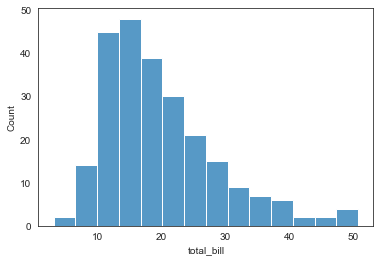

In [87]:
sns.histplot(tips['total_bill'])

parametras **kde** gali uždėti KDE liniją, o parametras **bins** padidinti stulpelių skaičių.

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

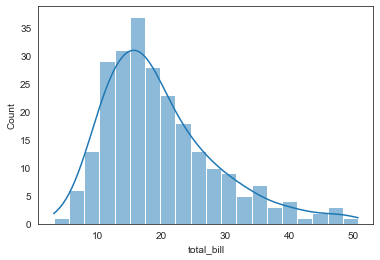

In [89]:
sns.histplot(tips['total_bill'], kde=True, bins=20)

Matome kad dažniausiai sąskaitos išrašomos tarp 10 ir 20$.

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

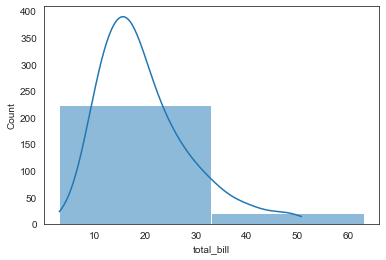

In [91]:
sns.histplot(tips['total_bill'], kde=True, binwidth=30)

Galime keisti histogramos statistiką, pvz probability.

Taip pat šiek tiek pakeitėme duomenų padavimą į funkciją

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

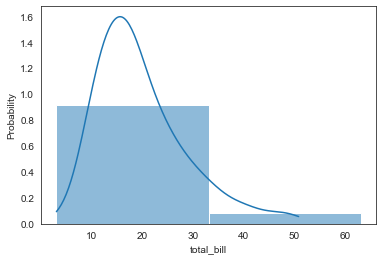

In [105]:
sns.histplot(data=tips, x='total_bill', kde=True, binwidth=30, stat="probability")

Pridedame pasiskirstymą pagal lytį

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

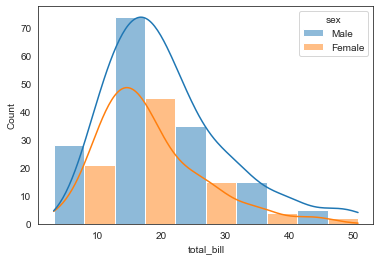

In [124]:
sns.histplot(data=tips, x='total_bill', kde=True, bins=5, hue="sex", multiple="dodge") # arba multiple="stack"

### .jointplot()

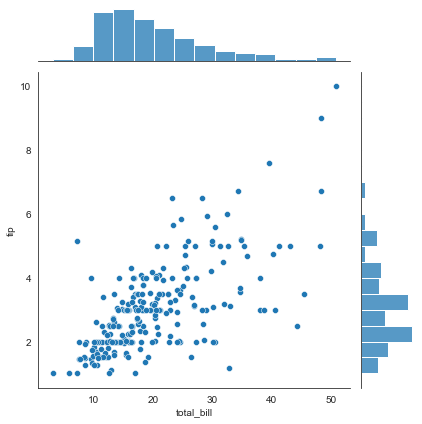

In [129]:
sns.jointplot(x='total_bill', y='tip', data=tips)

Matome, koks yra sąntykio tarp 'total_bill' ir 'tip' pasiskirstymas. Pagrindiniame lange yra sklaidos diagrama, o iš dešinės ir viršuje - tos pačios histogramos, iš kurių sukombinavome rezultatą.  

Rezultatą galime koreguoti su parametru **kind**:

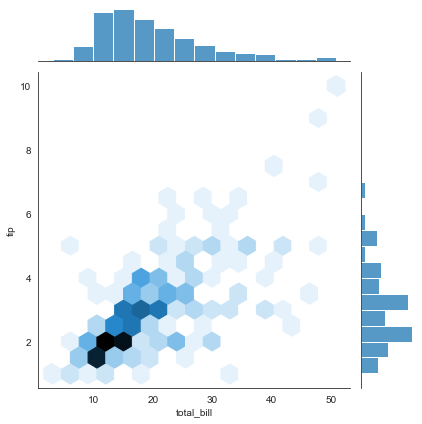

In [132]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

reikšmė 'reg' stengiasi nubrėžti mums liniją, kuri atspindėtų tendenciją.

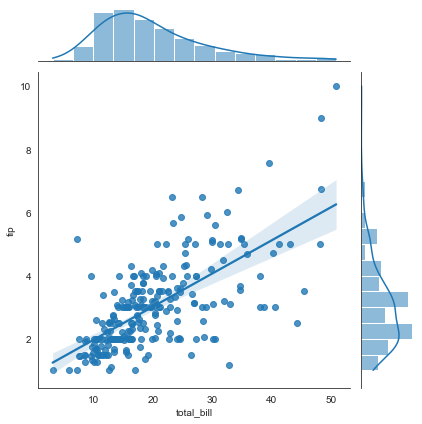

In [133]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

taip pat galime naudoti **kind** su 'kde' reikšme. Tokiu atveju matysime didžiausio tankio zonas:

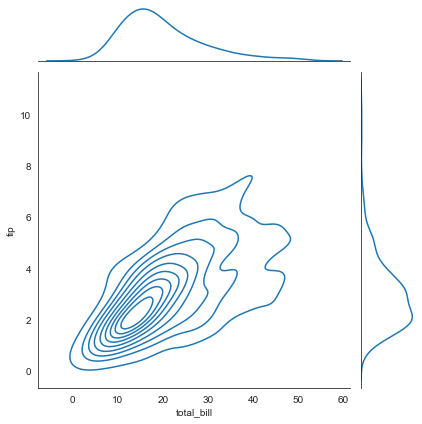

In [82]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

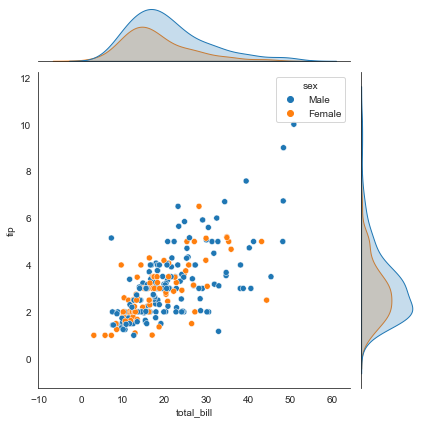

In [152]:
sns.jointplot(x='total_bill', y='tip', data=tips, hue="sex")

### .scatterplot() - sklaidos diagrama
parametruose nurodžius ašis ir šaltinį, nubrėžia mums sklaidos diagramą.

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

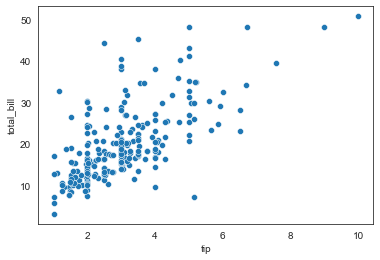

In [98]:
sns.scatterplot(x='tip', y='total_bill', data=tips)

Parametruose taip pat galima nurodyti **hue** ir **size** reikšmes:

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

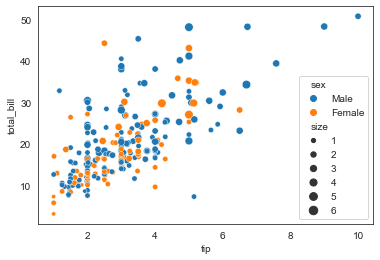

In [155]:
sns.scatterplot(x='tip', y='total_bill', data=tips, hue='sex', size='size')

### .pairplot()
duoda mums visas įmanomas pasiskirstymo ir sklaidos kombinacijas lentelėje:

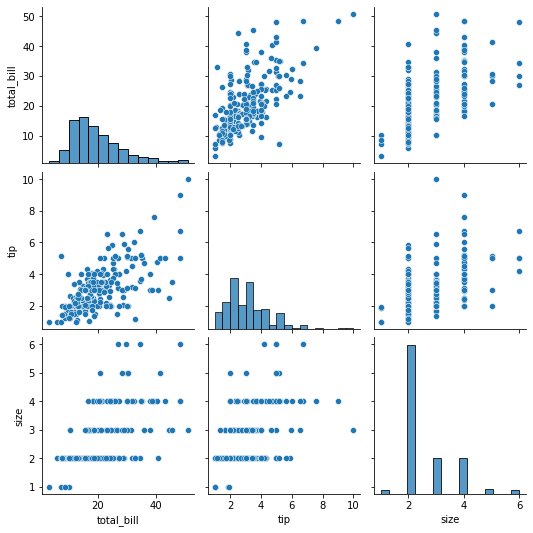

In [15]:
sns.pairplot(tips)

pvz, kairysis-apatinis grafikas yra ne kas kita, kaip:

<AxesSubplot:xlabel='total_bill', ylabel='size'>

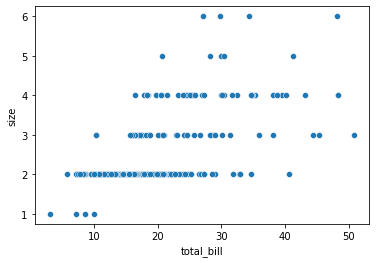

In [16]:
sns.scatterplot(x='total_bill', y='size', data=tips)

parametras **hue** išskiria kategorines reikšmes, o **diag_kind** šiuo atveju nurodo, kad įstrižainėje norime matyti ne histogramas, o kde linijas pvz.:

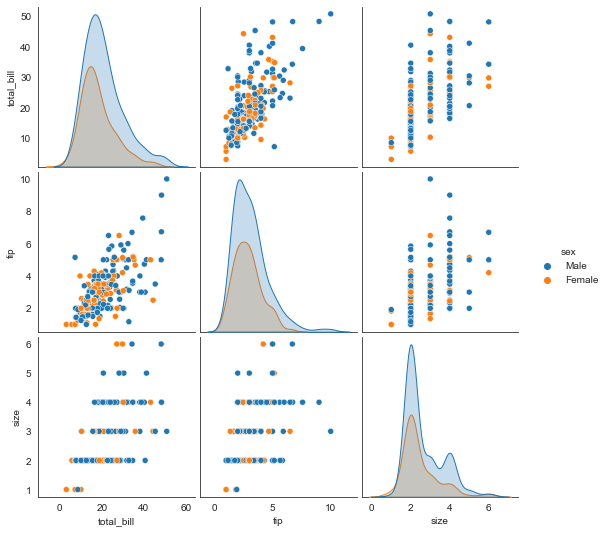

In [157]:
sns.pairplot(tips, hue='sex', diag_kind='kde')

Turime skirtingų spalvų taškus, kur oranžinė spalva reprezentuoja moteris.

### Bar chart (stulpelinė diagrama)

**.barplot()** išskirsto kategorijas pagal kurį nors rodiklį ir leidžia tam rodikliui taikyi kokią nors funkciją:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

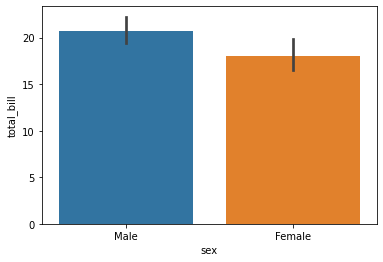

In [18]:
sns.barplot(x='sex', y='total_bill', data=tips)

Jeigu mes nenurodome, kokia ta funkcija, numatyta reikšmė yra vidurkis. Taigi šiame pavyzdyje matome sąskaitos vidurkių pasiskirstymą tarp lyčių. Jeigu norime nurodyti sumą, turime naudoti **estimator** parametrą, pvz.:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

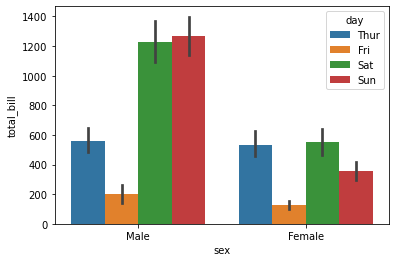

In [19]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)

Šiuo atveju matome bendras sumas. Taip pat panaudojome *hue*, tokiu būdu rezultatą išskirstydami savaitės dienomis. *Nekreipkite dėmesio į juodas linijas, jos yra error bars, rodo statistinį skaičiavimo patikimumą, ir nėra mums aktualios. Norint jas išjungti, parametruose nurodykite ci=False* 

### .countplot() tiesiog suskaičiuoja kategorijas: (panašu į histogramą)

<AxesSubplot:xlabel='smoker', ylabel='count'>

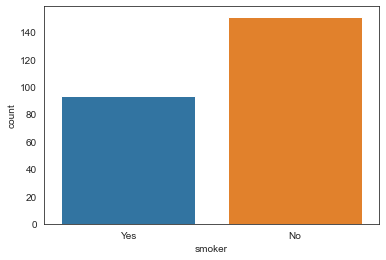

In [162]:
sns.countplot(x='smoker', data=tips)

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### .boxplot() - stačiakampės diagramos

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

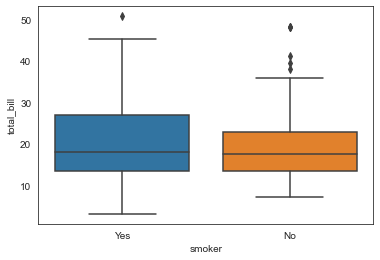

In [181]:
sns.boxplot(x='smoker', y='total_bill', data=tips)

Kas yra *boxplot* (stačiakampė diagrama)? Iš esmės tai į ketvirtadalius sugrupuota informacija. Mūsų pavyzdyje matosi, kad rūkalių viršutinis ketvirtadalis maistui išleido nuo ~28 iki ~46, kai tuo tarpu nerūkančiųjų viršutinis ketvirtadalis išleido nuo ~24 iki ~37. Taškai viršuje yra išimtys. Jie pasitaiko per retai, kad būtų įtraukti į ketvirtadalius.

Labai geras paaiškinimas - https://www.youtube.com/watch?v=Vo-bfTqEFQk&t=187s 

Ir papldoma dokumentacija - https://www.simplypsychology.org/boxplots.html

![](http://web.pdx.edu/~stipakb/download/PA551/boxplot_files/boxplot4.jpg)

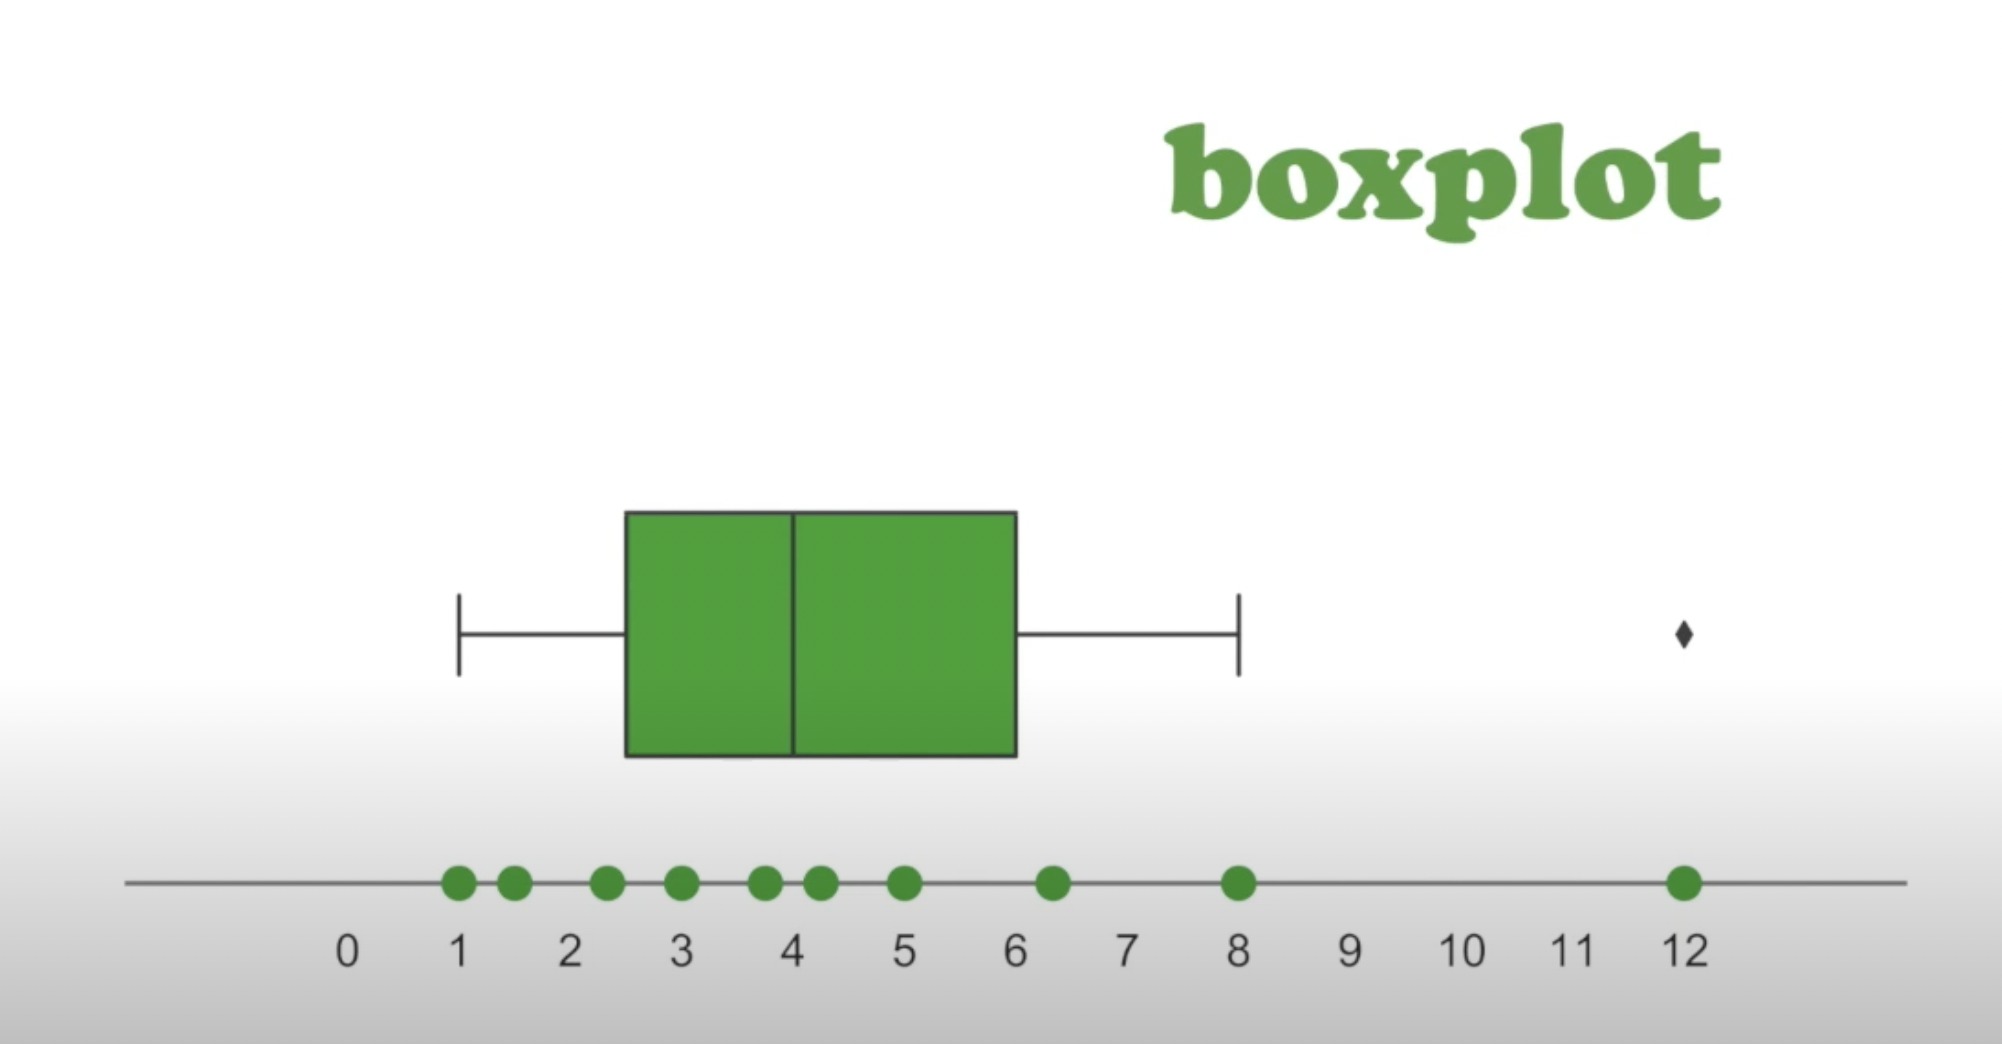

Šis paveikslėlis paaiškina boxplot atvaizdavimą.

### .heatmap() 

pandas turi metodą, kuris parodo skaičių koreliacijas lentelėje:

In [23]:
koreliacijos = tips.corr()

In [24]:
koreliacijos

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


čia turime koreliacijų matricą. Ji rodo, kaip skirtingi kintamieji tarpusavyje koreliuoja. Kad būtų lengviau skaityti, atsispausdinkime vizualizaciją (mozaikinę diagramą):

<AxesSubplot:>

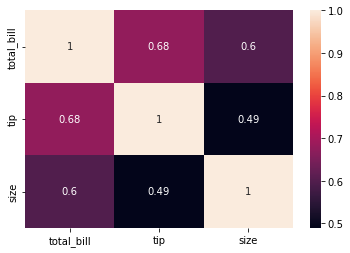

In [25]:
sns.heatmap(koreliacijos, annot=True)

### .FacetGrid()

**.FacetGrid()** leidžia susikurti tinklelį, kurį vėliau reikės užpildytyi diagramomis. Pvz.:

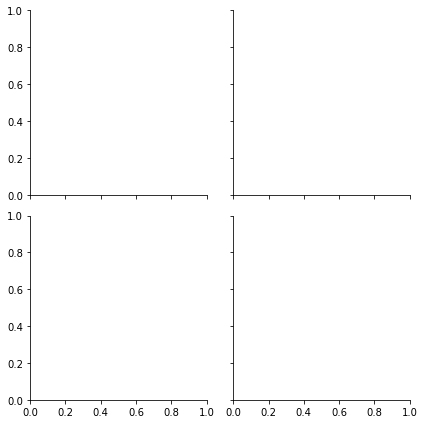

In [26]:
g = sns.FacetGrid(data=tips, col='time', row ='smoker')


O pats užpildymas atrodo taip:

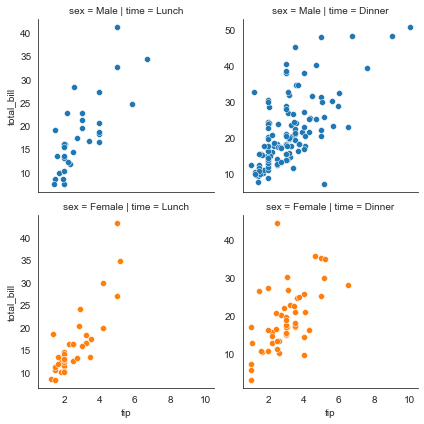

In [77]:
g = sns.FacetGrid(data = tips, col='time', row='sex', hue='sex', sharey=False) 
g.map(sns.scatterplot, 'tip', 'total_bill')

# g.set_axis_labels('Tips given', "Total bill")
# g.set_titles(template='{row_name} {col_name} Info' )
# arba
# g.map_dataframe(sns.histplot, y='total_bill') # map data frame leidzia naudoti keyword argumentus

Taip išskirstėme atvaizdavimą į keturias diagramas. Vienoje pavaizduotos moterys per pietus, kitoje moterys per vakarienę ir t.t.

### Stilius ir spalvos

### .set_style()

Seaborn leidžia nustatyti stilių su **.set_style()** metodu. Į parametrus reikia įkelti vieną iš šių reikšmių - darkgrid, whitegrid, dark, white, ticks. https://seaborn.pydata.org/tutorial/aesthetics.html

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

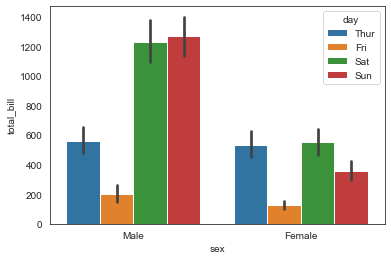

In [179]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)


### .despine()

Nuima viršutinį ir dešinį rėmą.

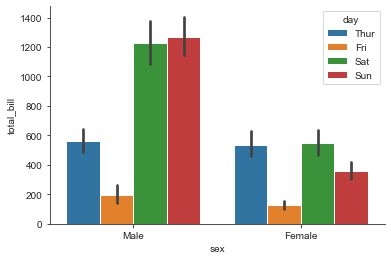

In [176]:
sns.set_style('ticks')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)
sns.despine()

### palette parametras
leidžia pasirinkti vieną iš paruoštų naudoti spalvų palečių. Jas rasite [čia](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#classes-of-colormaps). Kai kurie metodai nepriima parametro palette, tuomet reikia bandyti tas pačias reikšmes nurodyti į **cmap** parametrą

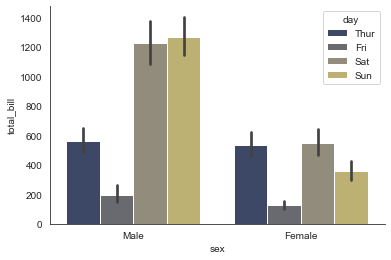

In [153]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum, palette='cividis')
sns.despine()

Rekomendacija: pasitikrinti galimus įvairių metodų parametrus galite kursoriui mirksint skliaustelių viduje, spaudžiant *Shift+Tab*. Nevenkite eksperimentuoti :) 